In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import re

### 데이터 불러오기

In [2]:
# 데이터 파일명 '0216_0223' 날짜 형식으로 저장
df = pd.read_excel('./원본데이터/0216_0223.xlsx')
df

,내용
0,문화/스포츠
1,"한국의 숨겨진 보석, 가장 과소평가된 관광지를 찾아보세요!"
2,Discover the Hidden Gems of South Korea: Uncov...
3,미국
4,Allkpop
...,...
1656,BTS Jimin and j-hope donate generously to the ...
1657,스포츠키다
1658,이번 달 터키와 시리아에서 발생한 비극적인 지진에 이어 유니세프한국위원회는 최근 방...
1659,"△640만 루피! 방탄소년단 지민·제이홉, 시리아·터키 지진피해 어린이 돕기 위해 ..."


In [3]:
w = list(df['내용'])
for i in range(len(w)):
    w[i] = str(w[i])
content = ' '.join(w)

In [4]:
filtered_content = content.replace('.', '').replace(',','').replace("'","").replace('·', ' ').replace('=','').replace('\n','')

### 한국어

In [5]:
import konlpy
Okt = konlpy.tag.Okt()
Okt_morphs = Okt.pos(filtered_content)  # 튜플반환

In [6]:
kor = []
for word, pos in Okt_morphs:
    if pos == 'Noun':
        kor.append(word)

In [7]:
# kor_stopwords에 불용어 추가
kor_stopwords = ['한국', '것', '수', '이', '그', '사람']
kor_total = []

for i in kor:
    if i not in kor_stopwords:
        kor_total.append(i)

In [8]:
from wordcloud import WordCloud
from collections import Counter

kor_count = Counter(kor_total)
kor_final = kor_count.most_common(1000)

kor_final

[('영화', 170),
 ('문화', 142),
 ('등', 140),
 ('곳', 136),
 ('말', 134),
 ('요리', 125),
 ('나', 123),
 ('중', 118),
 ('세계', 117),
 ('서울', 114),
 ('드라마', 114),
 ('그녀', 114),
 ('의', 112),
 ('더', 110),
 ('음식', 106),
 ('때', 103),
 ('전', 94),
 ('다른', 93),
 ('우리', 93),
 ('위해', 91),
 ('대한', 89),
 ('내', 87),
 ('가장', 84),
 ('시작', 80),
 ('작품', 80),
 ('모든', 78),
 ('위', 78),
 ('팬', 78),
 ('이야기', 75),
 ('사용', 74),
 ('감독', 73),
 ('인기', 72),
 ('그룹', 71),
 ('생각', 67),
 ('은', 67),
 ('통해', 67),
 ('자신', 64),
 ('태국', 64),
 ('경험', 63),
 ('옥', 63),
 ('때문', 63),
 ('제공', 62),
 ('가지', 62),
 ('를', 61),
 ('두', 59),
 ('하나', 57),
 ('및', 57),
 ('씨', 57),
 ('대해', 57),
 ('전통', 55),
 ('개', 54),
 ('몇', 54),
 ('김치', 54),
 ('팝', 53),
 ('방문', 52),
 ('아시아', 51),
 ('필리핀', 51),
 ('공연', 50),
 ('케이팝', 50),
 ('고', 50),
 ('다음', 49),
 ('볼', 48),
 ('예술', 47),
 ('만두', 47),
 ('배우', 47),
 ('시간', 46),
 ('여성', 45),
 ('지역', 44),
 ('일', 43),
 ('중국', 43),
 ('방탄소년단', 43),
 ('알', 42),
 ('재료', 42),
 ('약', 41),
 ('데', 41),
 ('산업', 41),
 ('후', 40),
 ('

### 영어

In [9]:
eng_text = filtered_content.encode('utf-8').decode('ascii', 'ignore')
eng_text = re.sub('[^a-zA-Z ]', '', eng_text).strip()

In [10]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']{3,}")
eng = tokenizer.tokenize(eng_text)

In [11]:
# eng_stopwords에 불용어 추가
eng_stopwords = ['the', 'Korean', 'The', 'and', 'for', 'South', 'Jorquere', 'Gney']
eng_total = []

for i in eng:
    if i not in eng_stopwords:
        eng_total.append(i)

In [12]:
eng_count = Counter(eng_total)
eng_final = eng_count.most_common(500)

eng_final

[('Kpop', 29),
 ('BTS', 24),
 ('KPOP', 14),
 ('Korea', 13),
 ('Kjun', 10),
 ('Jorquera', 9),
 ('Anima', 7),
 ('Box', 7),
 ('KOFIC', 6),
 ('Chaby', 6),
 ('neden', 6),
 ('Dizisi', 6),
 ('Konusu', 6),
 ('Nedir', 6),
 ('Oyuncular', 6),
 ('Kimler', 6),
 ('Koreli', 6),
 ('Cherry', 6),
 ('Art', 5),
 ('Boric', 5),
 ('from', 5),
 ('JHope', 5),
 ('OTT', 5),
 ('London', 5),
 ('Kim', 4),
 ('Chef', 4),
 ('New', 4),
 ('What', 4),
 ('KSCPP', 4),
 ('Youth', 4),
 ('Aegyo', 4),
 ('wat', 4),
 ('SNS', 4),
 ('mai', 4),
 ('VIP', 4),
 ('elendi', 4),
 ('Ayla', 4),
 ('filmi', 4),
 ('Find', 4),
 ('Your', 4),
 ('Memory', 4),
 ('Seoul', 4),
 ('nller', 4),
 ('devam', 4),
 ('ediyor', 4),
 ('Muhammad', 4),
 ('van', 4),
 ('Happiness', 4),
 ('Dizisinin', 4),
 ('SVS', 4),
 ('TOP', 4),
 ('Best', 3),
 ('East', 3),
 ('Top', 3),
 ('Times', 3),
 ('with', 3),
 ('White', 3),
 ('Asian', 3),
 ('Kast', 3),
 ('Lives', 3),
 ('Army', 3),
 ('That', 3),
 ('Are', 3),
 ('DWUGS', 3),
 ('SBS', 3),
 ('HYBE', 3),
 ('Musik', 3),
 ('Hallyu',

### 한국어 + 영어

In [13]:
kor_df = pd.DataFrame(kor_final, columns = ['word', 'count'])
eng_df = pd.DataFrame(eng_final, columns = ['word', 'count'])

In [14]:
final = pd.concat([kor_df, eng_df], axis=0)
final = final.sort_values('count', ascending=False)
final = final.reset_index(drop=True)
final

,word,count
0,영화,170
1,문화,142
2,등,140
3,곳,136
4,말,134
...,...,...
1495,RTMIS,1
1496,Miss,1
1497,Saigon,1
1498,Allegiance,1


### K팝 + 케이팝 + Kpop + KPop + KPOP

In [15]:
s = 53 + 50 + 29 + 14 + 2
final.loc[final['word'] == '팝', 'word'] = 'K팝'
final.loc[final['word'] == 'K팝', 'count'] = s
final = final.drop(index=final.loc[final.word == '케이팝'].index)
final = final.drop(index=final.loc[final.word == 'Kpop'].index)
final = final.drop(index=final.loc[final.word == 'KPop'].index)
final = final.drop(index=final.loc[final.word == 'KPOP'].index)
final.reset_index(drop=True, inplace=True)

### BTS + 방탄소년단

In [16]:
s = 43 + 24
final.loc[final['word'] == 'BTS', 'count'] = s
final = final.drop(index=final.loc[final.word == '방탄소년단'].index)
final.reset_index(drop=True, inplace=True)

### 블랙 - 핑크

In [17]:
final.loc[final['word'] == '블랙', 'word'] = '블랙핑크'
final = final.drop(index=final.loc[final.word == '핑크'].index)
final.reset_index(drop=True, inplace=True)

### 오징어 - 게임

In [18]:
final.loc[final['word'] == '오징어', 'word'] = '오징어게임'
final = final.drop(index=final.loc[final.word == '게임'].index)
final.reset_index(drop=True, inplace=True)

### 단어 수정

In [19]:
final.loc[final['word'] == '피지', 'word'] = '피지컬100'
final.loc[final['word'] == '손가락', 'word'] = '손가락하트'
final.loc[final['word'] == '데이비', 'word'] = '데이비추'
final.loc[final['word'] == '홉', 'word'] = '제이홉'
final.loc[final['word'] == '결심', 'word'] = '헤어질결심'
final.loc[final['word'] == '엑스', 'word'] = '몬스타엑스'

### 최종 워드클라우드

In [20]:
final = final.sort_values('count', ascending=False)
final = final.reset_index(drop=True)
final = final.head(100)
final

,word,count
0,영화,170
1,K팝,148
2,문화,142
3,등,140
4,곳,136
...,...,...
95,역,36
96,이후,36
97,한옥마을,35
98,음악,35


In [21]:
# 빈도표 내보내기 - 각 주차에 해당하는 날짜로 파일명 저장 
final.to_excel('./0216_0223_count.xlsx', index=False, encoding='cp949')

In [22]:
# 최종 상위 100개 빈도수
final_dict = final.set_index('word').to_dict()['count']
final_dict

{'영화': 170,
 'K팝': 148,
 '문화': 142,
 '등': 140,
 '곳': 136,
 '말': 134,
 '요리': 125,
 '나': 123,
 '중': 118,
 '세계': 117,
 '서울': 114,
 '드라마': 114,
 '그녀': 114,
 '의': 112,
 '더': 110,
 '음식': 106,
 '때': 103,
 '전': 94,
 '다른': 93,
 '우리': 93,
 '위해': 91,
 '대한': 89,
 '내': 87,
 '가장': 84,
 '시작': 80,
 '작품': 80,
 '위': 78,
 '모든': 78,
 '팬': 78,
 '이야기': 75,
 '사용': 74,
 '감독': 73,
 '인기': 72,
 '그룹': 71,
 '은': 67,
 '통해': 67,
 '생각': 67,
 'BTS': 67,
 '자신': 64,
 '태국': 64,
 '옥': 63,
 '때문': 63,
 '경험': 63,
 '제공': 62,
 '가지': 62,
 '를': 61,
 '두': 59,
 '및': 57,
 '씨': 57,
 '대해': 57,
 '하나': 57,
 '전통': 55,
 '김치': 54,
 '개': 54,
 '몇': 54,
 '방문': 52,
 '아시아': 51,
 '필리핀': 51,
 '고': 50,
 '공연': 50,
 '다음': 49,
 '볼': 48,
 '배우': 47,
 '만두': 47,
 '예술': 47,
 '시간': 46,
 '여성': 45,
 '지역': 44,
 '중국': 43,
 '일': 43,
 '알': 42,
 '재료': 42,
 '산업': 41,
 '약': 41,
 '데': 41,
 '후': 40,
 '매우': 40,
 '또한': 40,
 '포함': 39,
 '일본': 39,
 '속': 39,
 '제품': 38,
 '그것': 38,
 '동안': 38,
 '한국인': 38,
 '거리': 38,
 '모두': 38,
 '집': 37,
 '명': 37,
 '점': 37,
 '이번': 37,
 '미국': 

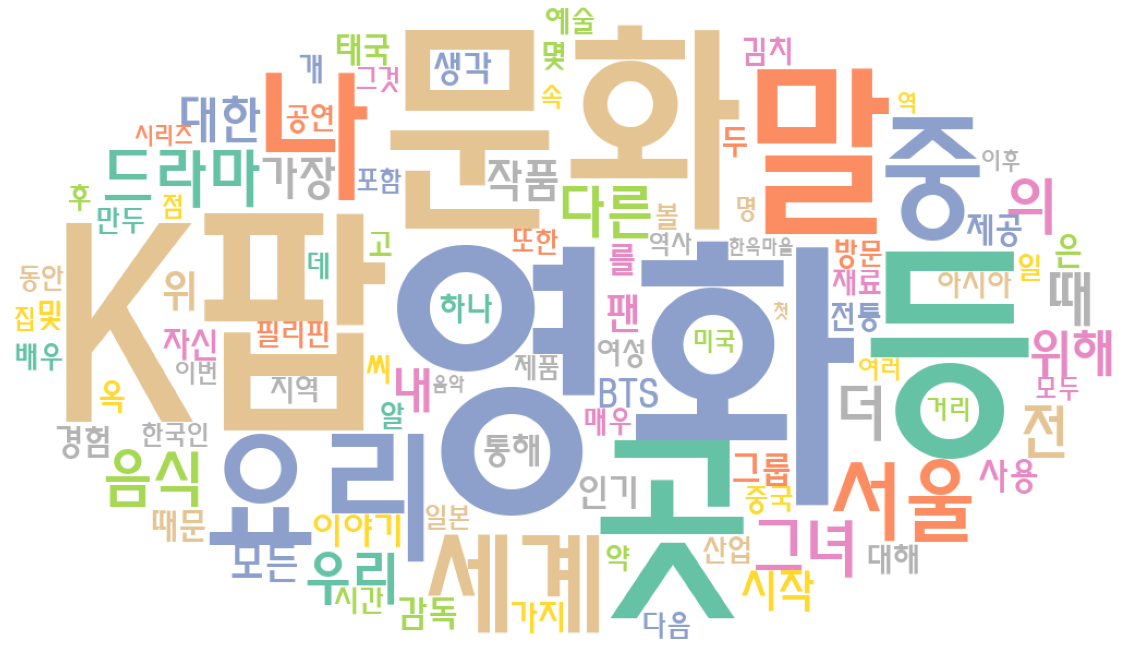

In [23]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
from collections import Counter

im = Image.open('mask.png') 
mask_arr = np.array(im) 

sns.set_style('white')
font_path = 'C:\Windows\Fonts\HMFMMUEX.TTC'


wc = WordCloud(font_path=font_path, background_color='white', colormap='Set2',width=2000, height=1000, mask=mask_arr,prefer_horizontal=True).generate_from_frequencies(final_dict)

plt.figure(figsize = (20, 20))  
plt.imshow(wc)

# 워드클라우드 내보내기 - 각 주차에 해당하는 날짜로 파일명 저장 
wc.to_file('0216_0223.png')
plt.axis('off')
plt.show()

In [24]:
# End of File